# Анализ данных вакансий сайта HH.ru
## Цель и ход исследования

Цель исследования: выявить различия в предлагаемых вакансиях для Аналитиков данных и Специалистов по Data Science.


Ход исследования:
Данные о вакансиях представлены в двух датафреймах. Прежде чем анализировать данные, необходимо выполнить предобработку данных.

Таким образом, исследование пройдет в несколько этапов:
* Обзор данных;
* Предобработка данных;
* Проведение анализа вакансий по грейдам;
* Проведение анализа вакансий по условиям труда;
* Проведение анализа вакансий по требуемым навыкам;
* Формулирование выводов и рекомендаций.

## Обзор данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#загрузим данные
data_da = pd.read_excel('vacancies_da.xlsx')
data_ds = pd.read_excel('vacancies_ds.xlsx')

In [3]:
#проверим данные
data_da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1801 non-null   int64         
 1   name                              1801 non-null   object        
 2   published_at                      1801 non-null   datetime64[ns]
 3   alternate_url                     1801 non-null   object        
 4   type                              1801 non-null   object        
 5   employer                          1801 non-null   object        
 6   department                        521 non-null    object        
 7   area                              1801 non-null   object        
 8   experience                        1801 non-null   object        
 9   key_skills                        1801 non-null   object        
 10  schedule                          1801 non-null 

Типы данных в датафрейме вакансий DA корректные. Пропуски есть в расчетных столбцах, в выгруженных данных пропусков нет (1801 значений).

In [4]:
data_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                974 non-null    int64         
 1   name                              974 non-null    object        
 2   published_at                      974 non-null    datetime64[ns]
 3   alternate_url                     974 non-null    object        
 4   type                              974 non-null    object        
 5   employer                          974 non-null    object        
 6   department                        413 non-null    object        
 7   area                              974 non-null    object        
 8   experience                        974 non-null    object        
 9   key_skills                        974 non-null    object        
 10  schedule                          974 non-null    

Типы данных в датафрейме вакансий DS корректные. Пропуски есть в расчетных столбцах, в выгруженных данных пропусков нет (974 значения).

## Предобработка данных

In [5]:
#проверим корректность данных и дубликаты
data_da.duplicated().sum()

0

In [6]:
data_da.duplicated(subset=['alternate_url']).sum()

0

In [7]:
data_da['experience'].unique()

array(['Junior (no experince)', 'Junior+ (1-3 years)',
       'Middle (3-6 years)', 'Senior (6+ years)'], dtype=object)

In [8]:
#представлены только первые 10 значений
data_da['employer'].sort_values().unique()[:10]

array(['2050.Лаб', '2ГИС', '7RedLines', 'ADVANCE AUTO', 'ANCOR',
       'AUXO (Атос АйТи Солюшенс энд Сервисез)', 'AVO.UZ', 'AWATERA',
       'AWG', 'Abi'], dtype=object)

In [9]:
#видим, что названия компаний разделены на филиалы/дочерние компании - агрегируем в головные компании для целостности картины
data_da['employer'] = data_da['employer'].replace(['SberAutoTech', 'Мегамаркет', 'СБЕР', 'СБЕР (ООО еАптека)', \
                                                   'СБЕРКОРУС', 'СК Сбербанк страхование жизни', 'СберЗдоровье', \
                                                   'СберЛизинг', 'СберМаркет', 'СберМаркетинг', 'СберМобайл', \
                                                   'СберОбразование', 'СберСити', 'СберСпасибо', 'Страховая компания Сбербанк страхование'], 'СБЕР')
data_da['employer'] = data_da['employer'].replace('Bell Integrator Регионы', 'Bell Integrator')
data_da['employer'] = data_da['employer'].replace('Ventra IT Solutions', 'Ventra')
data_da['employer'] = data_da['employer'].replace(['DNS Головной офис', 'DNS Технологии', 'Сеть магазинов цифровой и бытовой техники DNS'], 'DNS')
data_da['employer'] = data_da['employer'].replace(['X5 Digital', 'X5 Tech', 'Х5 IMPORT'], 'Х5 Group')
data_da['employer'] = data_da['employer'].replace(['Газпром нефть', 'Газпром трансгаз Томск', 'Газпромбанк', 'Оператор Газпром ИД'], 'Газпром')
data_da['employer'] = data_da['employer'].replace('Контур Компонентс', 'Контур')
data_da['employer'] = data_da['employer'].replace('МТС Финтех', 'МТС')
data_da['employer'] = data_da['employer'].replace(['Ренессанс cтрахование, Группа', 'Ренессанс Банк', 'СК Ренессанс Жизнь'], 'Ренессанс Групп')
data_da['employer'] = data_da['employer'].replace('Ростелеком - Центры обработки данных', 'Ростелеком')
data_da['employer'] = data_da['employer'].replace('Ситимобил ООО Транс-Миссия', 'Ситимобил')
data_da['employer'] = data_da['employer'].replace('Совкомбанк Лизинг', 'Совкомбанк')
data_da['employer'] = data_da['employer'].replace('Тест Платформа Пульс Узбекистан', 'Тест Платформа Пульс Холдинг')
data_da['employer'] = data_da['employer'].replace('Яндекс Практикум', 'Яндекс')


In [10]:
data_da['salary_bin'].unique()

array(['ЗП не указана', 'От 100 тысяч до 200 тысяч',
       'От 200 тысяч до 300 тысяч', 'Меньше 100 тысяч',
       'Больше 300 тысяч'], dtype=object)

In [11]:
#в части данных заработная плата указана только в верхней/нижней границе - приравняем указанную сумму к "отсутсвующей" границе
def correction_salary(row):
    '''
    Заменяет "отсутствующую" границу ЗП на ту, в которой есть данные.
    '''
    if row['salary_from'] > 0 and row['salary_to'] == 'nan':
        row['salary_to'] = row['salary_from']
    elif row['salary_to'] > 0 and row['salary_from'] == 'nan':
        row['salary_from'] = row['salary_to']
    return row

data_da = data_da.apply(correction_salary, axis=1)

In [12]:
#при обновлении данных по ЗП необзодимо скорректировать группы ЗП
def correction_salary_bin(row):
    '''
    Определяет группу в зависимости от размера ЗП.
    '''
    if 100000 > row['salary_from'] > 0 or 100000 > row['salary_to'] > 0:
        return 'Меньше 100 тысяч'
    elif 200000 > row['salary_from'] >= 100000 or 200000 > row['salary_to'] >= 100000:
        return 'От 100 тысяч до 200 тысяч'
    elif 300000 > row['salary_from'] >= 200000 or 300000 > row['salary_to'] >= 200000:
        return 'От 200 тысяч до 300 тысяч'
    elif row['salary_from'] >= 300000 or row['salary_to']  >= 300000:
        return 'Больше 300 тысяч'
    return 'ЗП не указана'

data_da['salary_bin'] = data_da.apply(correction_salary_bin, axis=1)

In [13]:
#создадим дополнительный столбец с месяцем для последущего анализа
data_da['month'] = data_da['published_at'].dt.strftime('%Y-%m')

In [14]:
#приведем столбец навыков в корректный для последующего анализа вид
data_da['key_skills'] = data_da['key_skills'].astype(str).str.replace('[', '').str.replace(']', '').str.replace("'", '')

Совершим те же действия для датафрейма DS.

In [15]:
#проверим корректность данных и дубликаты
data_ds.duplicated().sum()

0

In [16]:
data_ds.duplicated(subset=['alternate_url']).sum()

0

In [17]:
data_ds['experience'].unique()

array(['Junior (no experince)', 'Junior+ (1-3 years)',
       'Middle (3-6 years)', 'Senior (6+ years)'], dtype=object)

In [18]:
#представлены только первые 10 значений
data_ds['employer'].sort_values().unique()[:10]

array(['1221Системс', '22 Век Плюс', '2ГИС', '7RedLines', 'AMarkets',
       'ARK', 'AVO.UZ', 'Adwirk Group', 'Alliesverse', 'Appfox'],
      dtype=object)

In [19]:
#видим, что названия компаний разделены на филиалы/дочерние компании - агрегируем в головные компании для целостности картины
data_ds['employer'] = data_ds['employer'].replace(['SberAutoTech', 'СБЕР', 'СК Сбербанк страхование жизни', \
                                                   'СберЛизинг', 'Сбер Бизнес Софт', 'СберМаркет', 'Сбер Лигал', \
                                                   'СберОбразование', 'Страховая компания Сбербанк страхование'], 'СБЕР')
data_ds['employer'] = data_ds['employer'].replace('X5 Tech', 'Х5 Group')
data_ds['employer'] = data_ds['employer'].replace(['Газпром нефть', 'Газпромбанк'], 'Газпром')
data_ds['employer'] = data_ds['employer'].replace('МТС Финтех', 'МТС')
data_ds['employer'] = data_ds['employer'].replace(['Ренессанс cтрахование', 'СК Ренессанс Жизнь'], 'Ренессанс Групп')
data_ds['employer'] = data_ds['employer'].replace('Ингосстрах Банк', 'Ингосстрах')
data_ds['employer'] = data_ds['employer'].replace('Совкомбанк Технологии', 'Совкомбанк')
data_ds['employer'] = data_ds['employer'].replace(['ВТБ Лизинг', 'Банк ВТБ (ПАО)'], 'ВТБ')

In [20]:
data_ds['salary_bin'].unique()

array(['ЗП не указана', 'Больше 300 тысяч', 'От 200 тысяч до 300 тысяч',
       'Меньше 100 тысяч', 'От 100 тысяч до 200 тысяч'], dtype=object)

In [21]:
#в части данных заработная плата указана только в верхней/нижней границе - приравняем указанную сумму к "отсутсвующей" границе
data_ds = data_ds.apply(correction_salary, axis=1)

In [22]:
#при обновлении данных по ЗП необзодимо скорректировать группы ЗП
data_ds['salary_bin'] = data_ds.apply(correction_salary_bin, axis=1)

In [23]:
#создадим дополнительный столбец с месяцем для последущего анализа
data_ds['month'] = data_ds['published_at'].dt.strftime('%Y-%m')

In [24]:
#приведем столбец навыков в корректный для последующего анализа вид
data_ds['key_skills'] = data_ds['key_skills'].astype(str).str.replace('[', '').str.replace(']', '').str.replace("'", '')

На этапе предобработки данных были выполнены следующие действия:
1. Проанализированы дубликаты данных. Судя по уникальности всех ссылок вакансий, дубликатов данных нет.
2. Агрегированы работодатели: филиалы и дочерние организации названы по головной компании. Это обобщит кол-во вакансий по группе компаний.
3. Скорректированы границы зарабатной платы, если не представлена "викла": верхняя и нижняя границы, в таком случае, приравнены.
4. Скорректированы группы зарплаты в связи с корректировкой границ.
5. Добавлен столбец с месяцем размещения вакансии для последующего анализа.
6. Столбец с навыками приведен в корректный для последующего анализа вид.

Действия аналогичны для обоих датафреймов.

## Анализ вакансий по параметрам

### Анализ вакансий по грейдам

In [25]:
#для DA
data_da_grades = data_da.pivot_table(index='experience', values='id', aggfunc='count').reset_index()
data_da_grades.columns = ['grade', 'qty']
data_da_grades['grade_share_da'] = data_da_grades['qty'] / data_da_grades['qty'].sum() * 100
data_da_grades

,grade,qty,grade_share_da
0,Junior (no experince),142,7.884509
1,Junior+ (1-3 years),1091,60.577457
2,Middle (3-6 years),555,30.816213
3,Senior (6+ years),13,0.721821


In [26]:
#для DS
data_ds_grades = data_ds.pivot_table(index='experience', values='id', aggfunc='count').reset_index()
data_ds_grades.columns = ['grade', 'qty']
data_ds_grades['grade_share_ds'] = data_ds_grades['qty'] / data_ds_grades['qty'].sum() * 100
data_ds_grades

,grade,qty,grade_share_ds
0,Junior (no experince),44,4.517454
1,Junior+ (1-3 years),433,44.455852
2,Middle (3-6 years),465,47.741273
3,Senior (6+ years),32,3.285421


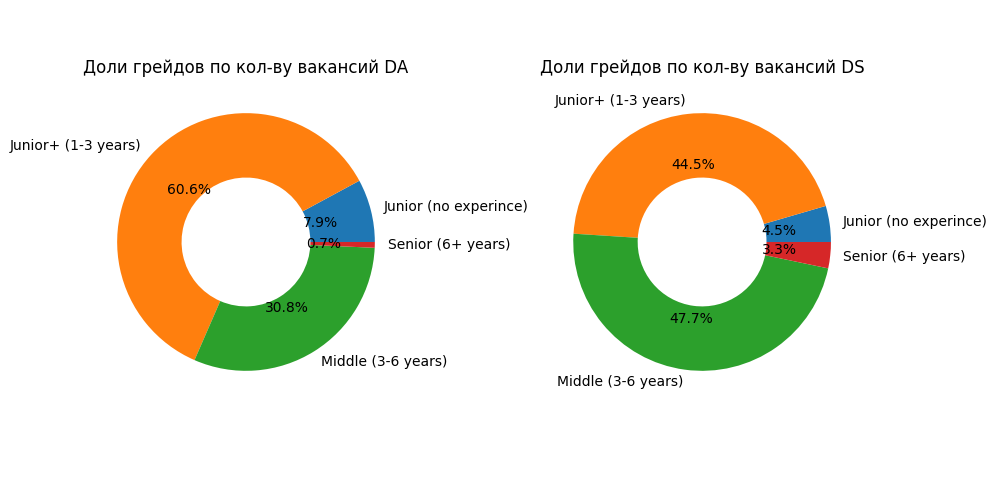

In [27]:
plt.subplots(figsize=(10,5))
plt.axis('off')
plt.subplot(1, 2, 1)
plt.pie(data_da_grades['grade_share_da'], labels=data_da['experience'].unique(), autopct='%1.1f%%', wedgeprops=dict(width=0.5))
plt.title('Доли грейдов по кол-ву вакансий DA')
plt.subplot(1, 2, 2)
plt.pie(data_ds_grades['grade_share_ds'], labels=data_ds['experience'].unique(), autopct='%1.1f%%', wedgeprops=dict(width=0.5))
plt.title('Доли грейдов по кол-ву вакансий DS')
plt.tight_layout()
plt.show()

На обе должности реже всего требуются Senior менеджеры (не более 4%), больше всего требуются Junior с оптыом 1-3 года работы (для DA - более половины от общего числа вакансий - 61%), и Middle (для DS - 48% ).

### Анализ вакансий по городам

In [28]:
#для DA
data_da_grades_city = data_da.pivot_table(index='area', columns='experience', values='id', aggfunc='count').fillna(0)
data_da_grades_city['area_sum'] = data_da_grades_city[data_da_grades_city.columns].sum(axis=1)
data_da_grades_city['area_sum_share'] = data_da_grades_city['area_sum'] / data_da_grades_city['area_sum'].sum() * 100
data_da_grades_city = data_da_grades_city.sort_values(by='area_sum', ascending= False)
data_da_grades_city = data_da_grades_city.head(3)
data_da_grades_city

experience,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years),area_sum,area_sum_share
area,,,,,,
Москва,71.0,732.0,431.0,13.0,1247.0,69.239311
Санкт-Петербург,19.0,106.0,56.0,0.0,181.0,10.049972
Екатеринбург,5.0,33.0,13.0,0.0,51.0,2.831760


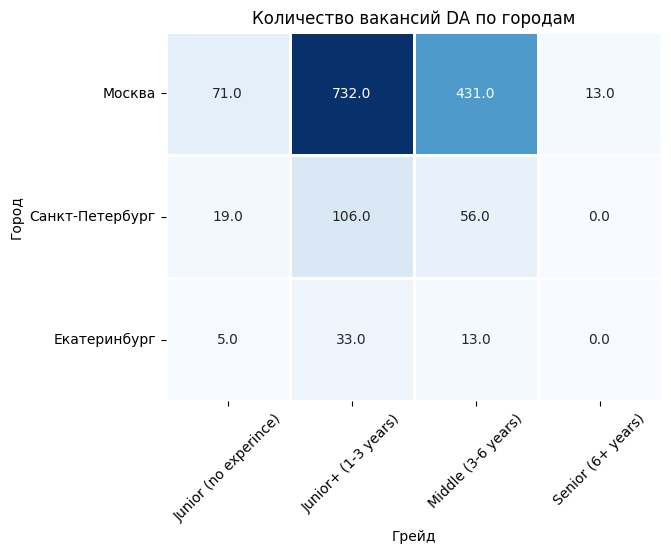

In [29]:
sns.heatmap(data_da_grades_city.drop(['area_sum', 'area_sum_share'], axis=1), cbar=False, cmap='Blues', annot=True, linewidth=1, fmt='1').set(
    title='Количество вакансий DA по городам')
plt.xlabel('Грейд')
plt.ylabel('Город')
plt.xticks(rotation=45)
plt.yticks(rotation=0);

В топ-3 городов по числу работодателей, разместивших объявление о найме DA, входят - Москва, Санкт-Петербург, Екатеренбург.
Больше всего требуется кадров в Москве - 69% от общего числа вакансий.

In [30]:
#для DS
data_ds_grades_city = data_ds.pivot_table(index='area', columns='experience', values='id', aggfunc='count').fillna(0)
data_ds_grades_city['area_sum'] = data_ds_grades_city[data_ds_grades_city.columns].sum(axis=1)
data_ds_grades_city['area_sum_share'] = data_ds_grades_city['area_sum'] / data_ds_grades_city['area_sum'].sum() * 100
data_ds_grades_city = data_ds_grades_city.sort_values(by='area_sum', ascending= False)
data_ds_grades_city = data_ds_grades_city.head(3)
data_ds_grades_city

experience,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years),area_sum,area_sum_share
area,,,,,,
Москва,29.0,317.0,386.0,30.0,762.0,78.234086
Санкт-Петербург,6.0,42.0,43.0,0.0,91.0,9.342916
Новосибирск,4.0,15.0,5.0,1.0,25.0,2.566735


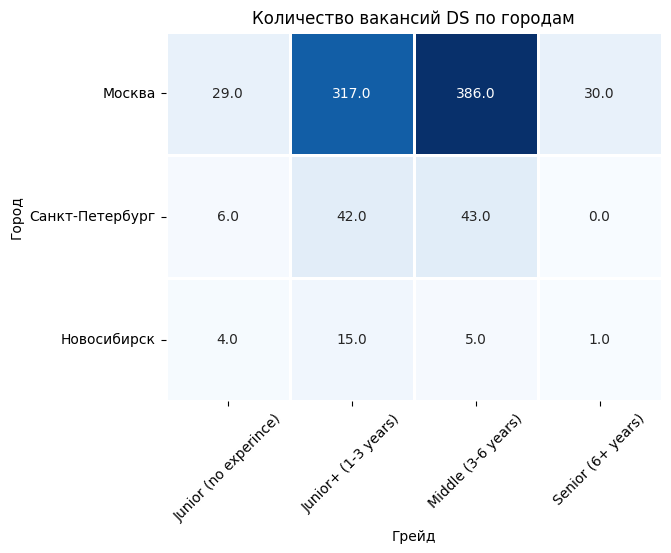

In [31]:
sns.heatmap(data_ds_grades_city.drop(['area_sum', 'area_sum_share'], axis=1), cbar=False, cmap='Blues', annot=True, linewidth=1, fmt='1').set(
    title='Количество вакансий DS по городам')
plt.xlabel('Грейд')
plt.ylabel('Город')
plt.xticks(rotation=45)
plt.yticks(rotation=0);

В топ-3 городов по числу работодателей, разместивших объявление о найме DS, входят - Москва, Санкт-Петербург, Новосибирск.
Больше всего требуется кадров в Москве - 78% от общего числа вакансий.

### Анализ вакансий по работодателям

In [32]:
#для DA
data_da_grades_empl = data_da.pivot_table(index='employer', columns='experience', values='id', aggfunc='count').fillna(0)
data_da_grades_empl['empl_sum'] = data_da_grades_empl[data_da_grades_empl.columns].sum(axis=1)
data_da_grades_empl['empl_sum_share'] = data_da_grades_empl['empl_sum'] / data_da_grades_empl['empl_sum'].sum() * 100
data_da_grades_empl = data_da_grades_empl.sort_values(by='empl_sum', ascending= False)
data_da_grades_empl = data_da_grades_empl.head(3)
data_da_grades_empl

experience,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years),empl_sum,empl_sum_share
employer,,,,,,
СБЕР,13.0,175.0,81.0,0.0,269.0,14.936147
WILDBERRIES,1.0,16.0,26.0,0.0,43.0,2.387562
Ozon,2.0,17.0,15.0,0.0,34.0,1.887840


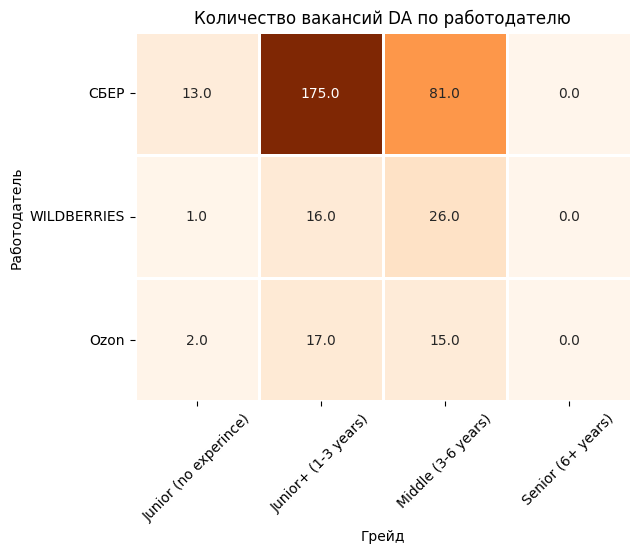

In [33]:
sns.heatmap(data_da_grades_empl.drop(['empl_sum', 'empl_sum_share'], axis=1), cbar=False, cmap='Oranges', annot=True, linewidth=1, fmt='1').set(
    title='Количество вакансий DA по работодателю')
plt.xlabel('Грейд')
plt.ylabel('Работодатель')
plt.xticks(rotation=45)
plt.yticks(rotation=0);

В число ТОП-3 работодателей среди вакансий DA входят: СБЕР, WILDBERRIES и Ozon. Тем не менее, Сбер составляет 14% от общего числа вакансий, среди которых, наибольшее кол-во составляет вакансии Junior с 1-3 годом опыта работы.

In [34]:
#для DS
data_ds_grades_empl = data_ds.pivot_table(index='employer', columns='experience', values='id', aggfunc='count').fillna(0)
data_ds_grades_empl['empl_sum'] = data_ds_grades_empl[data_ds_grades_empl.columns].sum(axis=1)
data_ds_grades_empl['empl_sum_share'] = data_ds_grades_empl['empl_sum'] / data_ds_grades_empl['empl_sum'].sum() * 100
data_ds_grades_empl = data_ds_grades_empl.sort_values(by='empl_sum', ascending= False)
data_ds_grades_empl = data_ds_grades_empl.head(3)
data_ds_grades_empl

experience,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years),empl_sum,empl_sum_share
employer,,,,,,
СБЕР,12.0,106.0,97.0,2.0,217.0,22.279261
Ozon,4.0,7.0,25.0,0.0,36.0,3.696099
Газпром,0.0,10.0,24.0,1.0,35.0,3.593429


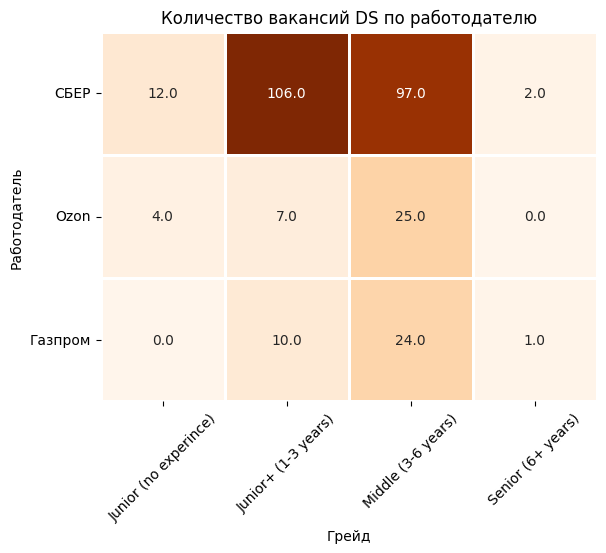

In [35]:
sns.heatmap(data_ds_grades_empl.drop(['empl_sum', 'empl_sum_share'], axis=1), cbar=False, cmap='Oranges', annot=True, linewidth=1, fmt='1').set(
    title='Количество вакансий DS по работодателю')
plt.xlabel('Грейд')
plt.ylabel('Работодатель')
plt.xticks(rotation=45)
plt.yticks(rotation=0);

Картина примерна аналогична с DA вакансийями. В число ТОП-3 работодателей входят: СБЕР, Ozon и Газпром. Сбер здесь составляет уже 22% от общего числа вакансий, среди которых также, наибольшее кол-во составляет вакансии Junior с 1-3 годом опыта работы. Стоит отметить, что кол-во вакансий Middle примерно на том же уровне.

### Анализ вакансий по ЗП

In [36]:
##для DA
data_da_grades_sal = data_da.pivot_table(index='salary_bin', columns='experience', values='id', aggfunc='count').fillna(0)
data_da_grades_sal['sal_sum'] = data_da_grades_sal[data_da_grades_sal.columns].sum(axis=1)
data_da_grades_sal['sal_sum_share'] = data_da_grades_sal['sal_sum'] / data_da_grades_sal['sal_sum'].sum() * 100
data_da_grades_sal = data_da_grades_sal.sort_values(by='sal_sum', ascending= False)
data_da_grades_sal

experience,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years),sal_sum,sal_sum_share
salary_bin,,,,,,
ЗП не указана,76.0,836.0,457.0,10.0,1379.0,76.568573
Меньше 100 тысяч,60.0,121.0,9.0,1.0,191.0,10.605219
От 100 тысяч до 200 тысяч,6.0,117.0,47.0,0.0,170.0,9.439200
От 200 тысяч до 300 тысяч,0.0,16.0,29.0,2.0,47.0,2.609661
Больше 300 тысяч,0.0,1.0,13.0,0.0,14.0,0.777346


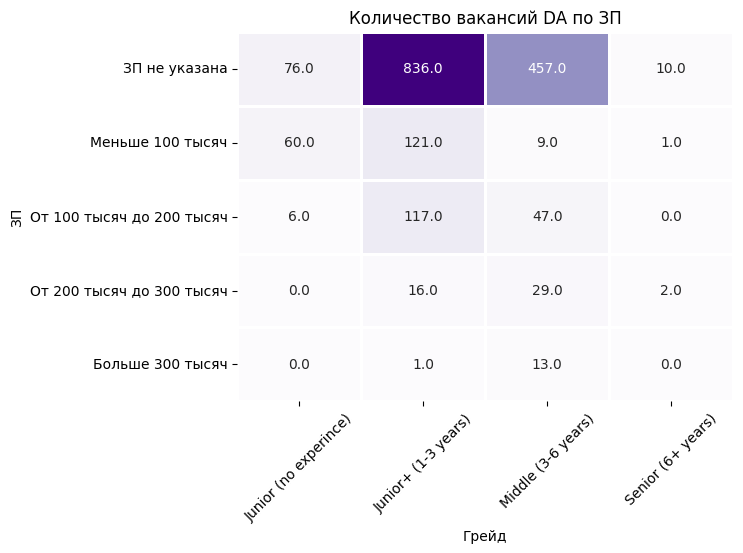

In [37]:
sns.heatmap(data_da_grades_sal.drop(['sal_sum', 'sal_sum_share'], axis=1), cbar=False, cmap='Purples', annot=True, linewidth=1, fmt='1').set(
    title='Количество вакансий DA по ЗП')
plt.xlabel('Грейд')
plt.ylabel('ЗП')
plt.xticks(rotation=45)
plt.yticks(rotation=0);

Чаще всего, среди вакансий DA заработная плата не указывается. Среди указанных ЗП, наибольшую долю составляет ЗП менее 100 тыс.руб - 11%.

In [38]:
#для DS
data_ds_grades_sal = data_ds.pivot_table(index='salary_bin', columns='experience', values='id', aggfunc='count').fillna(0)
data_ds_grades_sal['sal_sum'] = data_ds_grades_sal[data_ds_grades_sal.columns].sum(axis=1)
data_ds_grades_sal['sal_sum_share'] = data_ds_grades_sal['sal_sum'] / data_ds_grades_sal['sal_sum'].sum() * 100
data_ds_grades_sal = data_ds_grades_sal.sort_values(by='sal_sum', ascending= False)
data_ds_grades_sal

experience,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years),sal_sum,sal_sum_share
salary_bin,,,,,,
ЗП не указана,33.0,377.0,414.0,29.0,853.0,87.577002
От 100 тысяч до 200 тысяч,2.0,26.0,9.0,1.0,38.0,3.901437
От 200 тысяч до 300 тысяч,0.0,10.0,23.0,0.0,33.0,3.388090
Больше 300 тысяч,0.0,9.0,15.0,2.0,26.0,2.669405
Меньше 100 тысяч,9.0,11.0,4.0,0.0,24.0,2.464066


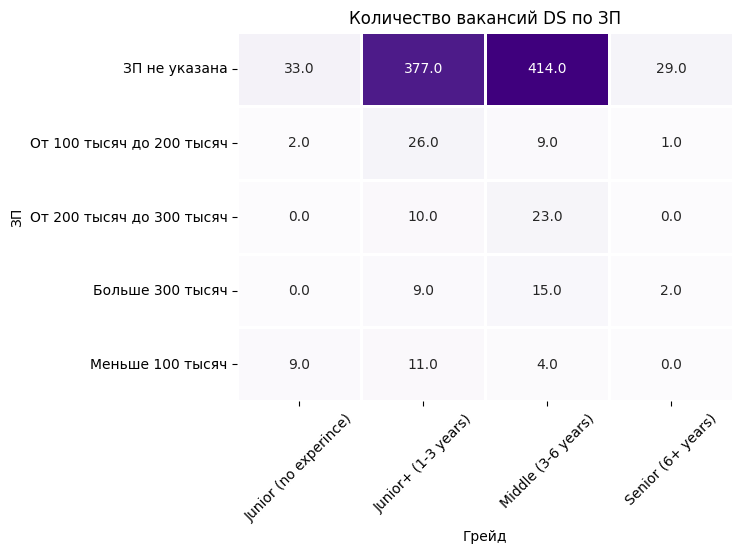

In [39]:
sns.heatmap(data_ds_grades_sal.drop(['sal_sum', 'sal_sum_share'], axis=1), cbar=False, cmap='Purples', annot=True, linewidth=1, fmt='1').set(
    title='Количество вакансий DS по ЗП')
plt.xlabel('Грейд')
plt.ylabel('ЗП')
plt.xticks(rotation=45)
plt.yticks(rotation=0);

Среди вакансий DS около 88% ЗП не указана. Среди указанных ЗП, чаще всего встречается ЗП от 100 тыс.руб. до 200 тыс.руб. - 4% от общего числа вакансий.

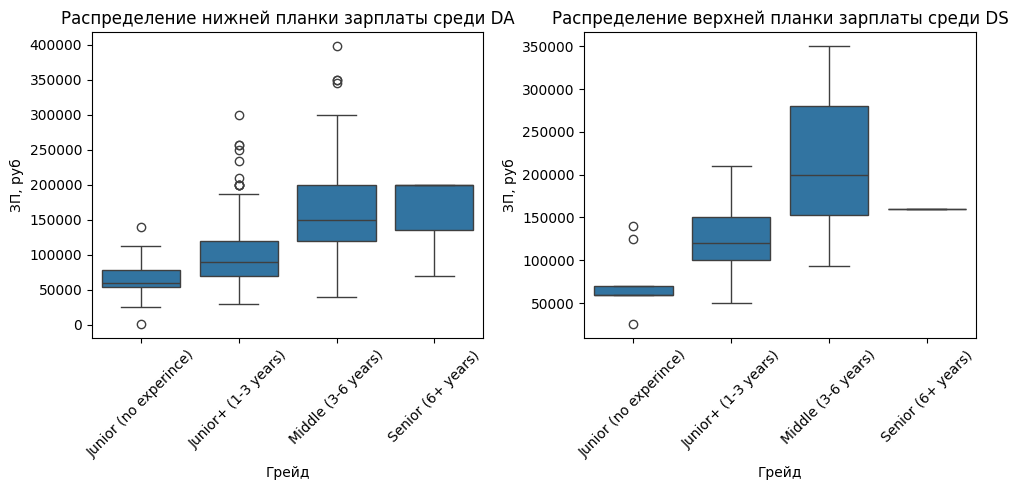

In [40]:
plt.subplots(figsize=(10,5))
plt.axis('off')
plt.subplot(1, 2, 1)

sns.boxplot(x=data_da.experience, y=data_da.salary_from)
plt.xlabel('Грейд')
plt.ylabel('ЗП, руб')
plt.xticks(rotation=45)
plt.title('Распределение нижней планки зарплаты среди DA')

plt.subplot(1, 2, 2)
sns.boxplot(x=data_ds.experience, y=data_ds.salary_from)
plt.xlabel('Грейд')
plt.ylabel('ЗП, руб')
plt.xticks(rotation=45)
plt.title('Распределение верхней планки зарплаты среди DS')
plt.tight_layout()
plt.show()

Анализируя минимальные вилки заработных плат для DA и DS, можно сделать вывод, что в целом, медианные ЗП по грейдам выше у DS, чем у DA.

### Анализ вакансий по графику работы

In [41]:
#для DA
data_da_grades_sched = data_da.pivot_table(index='schedule', columns='experience', values='id', aggfunc='count').fillna(0)
data_da_grades_sched['sched_sum'] = data_da_grades_sched[data_da_grades_sched.columns].sum(axis=1)
data_da_grades_sched['sched_sum_share'] = data_da_grades_sched['sched_sum'] / data_da_grades_sched['sched_sum'].sum() * 100
data_da_grades_sched = data_da_grades_sched.sort_values(by='sched_sum', ascending= False)
data_da_grades_sched

experience,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years),sched_sum,sched_sum_share
schedule,,,,,,
Полный день,122.0,905.0,406.0,8.0,1441.0,80.011105
Удаленная работа,15.0,158.0,132.0,5.0,310.0,17.212660
Гибкий график,3.0,21.0,17.0,0.0,41.0,2.276513
Сменный график,2.0,7.0,0.0,0.0,9.0,0.499722


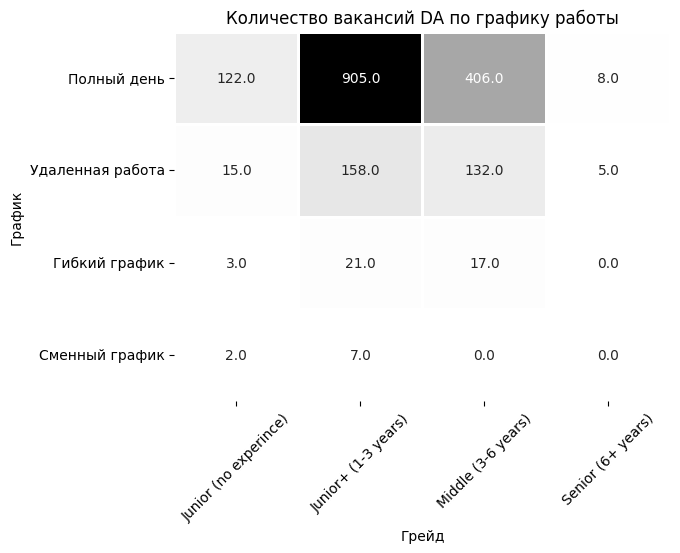

In [42]:
sns.heatmap(data_da_grades_sched.drop(['sched_sum', 'sched_sum_share'], axis=1), cbar=False, cmap='Greys', annot=True, linewidth=1, fmt='1').set(
    title='Количество вакансий DA по графику работы')
plt.xlabel('Грейд')
plt.ylabel('График')
plt.xticks(rotation=45)
plt.yticks(rotation=0);

80% вакансий DA требуют присутсвие в офисе на полный рабочий день. Удаленный формат также популяризируется и составляет 17% от общего числа вакансий.

In [43]:
#для DS
data_ds_grades_sched = data_ds.pivot_table(index='schedule', columns='experience', values='id', aggfunc='count').fillna(0)
data_ds_grades_sched['sched_sum'] = data_ds_grades_sched[data_ds_grades_sched.columns].sum(axis=1)
data_ds_grades_sched['sched_sum_share'] = data_ds_grades_sched['sched_sum'] / data_ds_grades_sched['sched_sum'].sum() * 100
data_ds_grades_sched = data_ds_grades_sched.sort_values(by='sched_sum', ascending= False)
data_ds_grades_sched

experience,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years),sched_sum,sched_sum_share
schedule,,,,,,
Полный день,28.0,316.0,355.0,24.0,723.0,74.229979
Удаленная работа,9.0,99.0,90.0,5.0,203.0,20.841889
Гибкий график,7.0,15.0,19.0,2.0,43.0,4.414784
Сменный график,0.0,3.0,1.0,1.0,5.0,0.513347


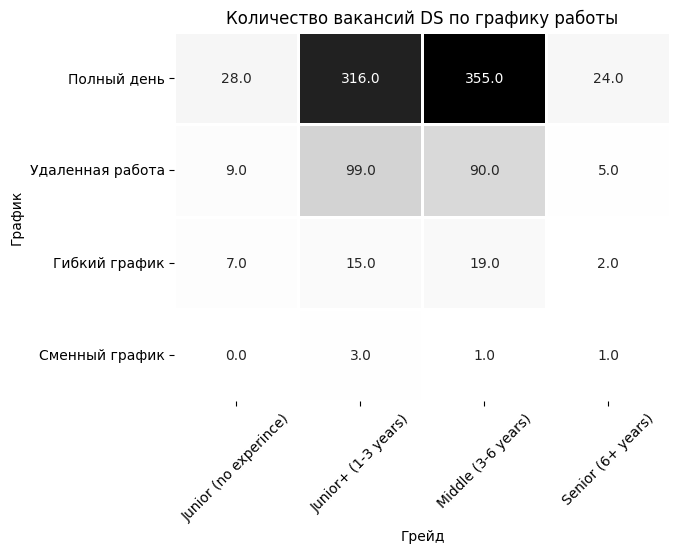

In [44]:
sns.heatmap(data_ds_grades_sched.drop(['sched_sum', 'sched_sum_share'], axis=1), cbar=False, cmap='Greys', annot=True, linewidth=1, fmt='1').set(
    title='Количество вакансий DS по графику работы')
plt.xlabel('Грейд')
plt.ylabel('График')
plt.xticks(rotation=45)
plt.yticks(rotation=0);

Разбивка по графику работ вакансий DS примерна аналогична с DA. Здесь, доли полного дня и удаленной работы составляют 74% и 21% соответсвенно.

### Анализ вакансий по типу занятости

In [45]:
#для DA
data_da_grades_empt = data_da.pivot_table(index='employment', columns='experience', values='id', aggfunc='count').fillna(0)
data_da_grades_empt = data_da_grades_empt.fillna(0)
data_da_grades_empt['empt_sum'] = data_da_grades_empt[data_da_grades_empt.columns].sum(axis=1)
data_da_grades_empt['empt_sum_share'] = data_da_grades_empt['empt_sum'] / data_da_grades_empt['empt_sum'].sum() * 100
data_da_grades_empt = data_da_grades_empt.sort_values(by='empt_sum', ascending= False)
data_da_grades_empt

experience,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years),empt_sum,empt_sum_share
employment,,,,,,
Полная занятость,123.0,1079.0,549.0,13.0,1764.0,97.945586
Стажировка,15.0,1.0,0.0,0.0,16.0,0.888395
Частичная занятость,3.0,8.0,5.0,0.0,16.0,0.888395
Проектная работа,1.0,3.0,1.0,0.0,5.0,0.277624


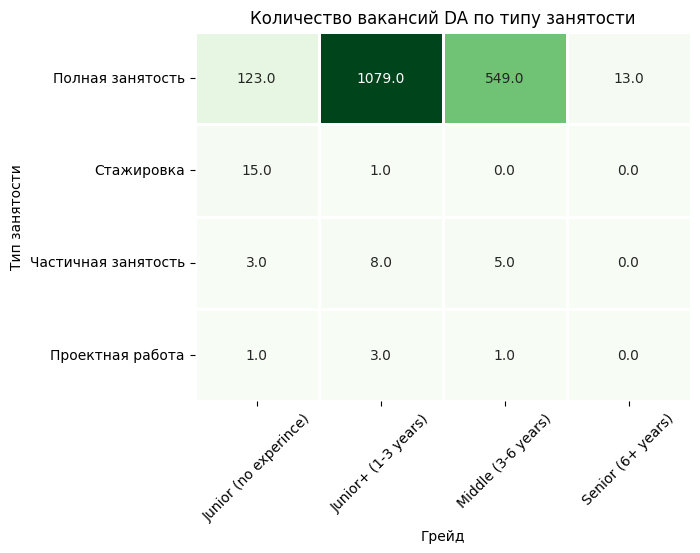

In [46]:
sns.heatmap(data_da_grades_empt.drop(['empt_sum', 'empt_sum_share'], axis=1), cbar=False, cmap='Greens', annot=True, linewidth=1, fmt='1').set(
    title='Количество вакансий DA по типу занятости')
plt.xlabel('Грейд')
plt.ylabel('Тип занятости')
plt.xticks(rotation=45)
plt.yticks(rotation=0);

98% вакансий DA требуют полной занятости соискателя.

In [47]:
#для DS
data_ds_grades_empt = data_ds.pivot_table(index='employment', columns='experience', values='id', aggfunc='count').fillna(0)
data_ds_grades_empt = data_ds_grades_empt.fillna(0)
data_ds_grades_empt['empt_sum'] = data_ds_grades_empt[data_ds_grades_empt.columns].sum(axis=1)
data_ds_grades_empt['empt_sum_share'] = data_ds_grades_empt['empt_sum'] / data_ds_grades_empt['empt_sum'].sum() * 100
data_ds_grades_empt = data_ds_grades_empt.sort_values(by='empt_sum', ascending= False)
data_ds_grades_empt

experience,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years),empt_sum,empt_sum_share
employment,,,,,,
Полная занятость,26.0,422.0,462.0,32.0,942.0,96.714579
Стажировка,17.0,2.0,0.0,0.0,19.0,1.950719
Частичная занятость,0.0,7.0,1.0,0.0,8.0,0.821355
Проектная работа,1.0,2.0,2.0,0.0,5.0,0.513347


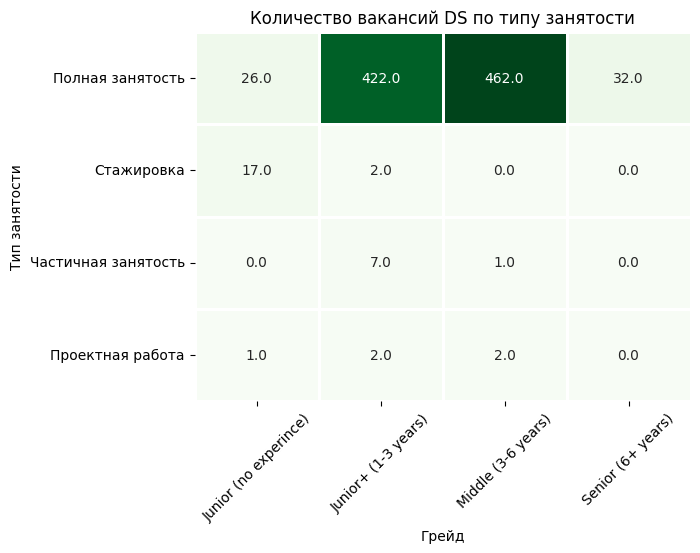

In [48]:
sns.heatmap(data_ds_grades_empt.drop(['empt_sum', 'empt_sum_share'], axis=1), cbar=False, cmap='Greens', annot=True, linewidth=1, fmt='1').set(
    title='Количество вакансий DS по типу занятости')
plt.xlabel('Грейд')
plt.ylabel('Тип занятости')
plt.xticks(rotation=45)
plt.yticks(rotation=0);

Аналогично с DA, 97% вакансий DS требуют полной занятости соискателя.

### Анализ вакансий по требуемым навыкам

In [49]:
#для DA - рассмотрим все требуемые навыки
#расчитаем, как часто запрашивают каждый навык
#будут приведены топ-10 навыков
key_skills_list_da = data_da['key_skills'].tolist()
new_key_skills_list_da = []

for skills in key_skills_list_da:
    if len(skills) > 3:
        split_skills = skills.split(', ')
        for skill in split_skills:
            new_key_skills_list_da.append(skill.strip())
    else:
        new_key_skills_list_da.append(skills)

from collections import Counter
skill_counter = Counter(new_key_skills_list_da)
most_common_skills_da = skill_counter.most_common()

first_10_skills_da = most_common_skills_da[:10]
first_10_skills_da

[('SQL', 765),
 ('Python', 581),
 ('Анализ данных', 408),
 ('', 383),
 ('Аналитическое мышление', 365),
 ('Pandas', 304),
 ('Документация', 280),
 ('Power BI', 222),
 ('MS Excel', 207),
 ('Работа с базами данных', 185)]

In [50]:
#сагрегировав дублирующиеся/относящиеся к одной группе навыки отдельно в excel, создаем отдельную таблицу
key_skills_da = pd.read_excel('key_skills_da.xlsx')
key_skills_da = key_skills_da.query('num > 200')
key_skills_da

,skills,num
0,Анализ данных,1268
1,SQL,1016
2,Python,581
3,BI системы,479
4,Аналитическое мышление,405
5,NaN,383
6,Работа с базами данных,347
7,Pandas,328
8,Документация,294
9,Excel,254


In [51]:
#для DS - рассмотрим все требуемые навыки
#расчитаем, как часто запрашивают каждый навык
#будут приведены топ-10 навыков
key_skills_list_ds = data_ds['key_skills'].tolist()
new_key_skills_list_ds = []

for skills in key_skills_list_ds:
    if len(skills) > 3:
        split_skills = skills.split(', ')
        for skill in split_skills:
            new_key_skills_list_ds.append(skill.strip())
    else:
        new_key_skills_list_ds.append(skills)

from collections import Counter
skill_counter = Counter(new_key_skills_list_ds)
most_common_skills_ds = skill_counter.most_common()

first_10_skills_ds = most_common_skills_ds[:10]
first_10_skills_ds

[('Python', 439),
 ('Pandas', 375),
 ('SQL', 260),
 ('', 166),
 ('Документация', 165),
 ('Machine Learning', 131),
 ('ML', 112),
 ('Коммуникация', 111),
 ('Математическая статистика', 81),
 ('Data Science', 81)]

In [52]:
#сагрегировав дублирующиеся/относящиеся к одной группе навыки отдельно в excel, создаем отдельную таблицу
#т.к. кол-во вакансий DS составляет около половины от DA, снизим на тот же объем критерий фильтрации
key_skills_ds = pd.read_excel('key_skills_ds.xlsx')
key_skills_ds = key_skills_ds.query('num > 100')
key_skills_ds

,skill,num
0,Python,442
1,Pandas,398
2,SQL,331
3,ML,311
4,Анализ данных,206
5,NaN,166
6,Документация,165
7,Коммуникация,119
8,Data Science,116


Сравнивая вакансии DA и DS, можно отметить, что аналитикам требуется, в первую очередь, навыки анализа данных, знание SQL и Python. Также важную роль составляют навыки презентации аналитики и полученных результатов посредством BI систем.

Среди вакансий DS нет острой необходимости презентовать навыки, знание Python требуется чаще остальных навыков.

In [53]:
#расчитаем кол-во навыков, требуемых в вакансии
#для DA
def counter(row):
    '''
    Возвращает кол-во навыков, требуемых в вакансии.
    '''
    words = row.split(",")
    num_words = len(words)
    return num_words
data_da['key_skills_num'] = data_da['key_skills'].apply(counter)

In [54]:
data_da_grades_skill = data_da.pivot_table(index='key_skills_num', columns='experience', values='id', aggfunc='count').fillna(0)
data_da_grades_skill = data_da_grades_skill.sort_values(by='key_skills_num', ascending = False)
data_da_grades_skill.head(1)

experience,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years)
key_skills_num,,,,
33,0.0,1.0,0.0,0.0


In [55]:
#для DS
data_ds['key_skills_num'] = data_ds['key_skills'].apply(counter)
data_ds_grades_skill = data_ds.pivot_table(index='key_skills_num', columns='experience', values='id', aggfunc='count').fillna(0)
data_ds_grades_skill = data_ds_grades_skill.sort_values(by='key_skills_num', ascending = False)
data_ds_grades_skill.head(1)

experience,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years)
key_skills_num,,,,
24,0.0,0.0,2.0,1.0


Больше всего требуемых навыков запросили у DA на должности Junior+ - 33 навыка в общей сумме.
Среди DS наибольшее кол-во требуемых навыков составило 24 - их спрашивают у Middle и Senior.

In [56]:
#рассмотрим частоту запроса топовых навыков среди DA и DS по грейдам
#для DA
sql_vacancies_da = data_da[(data_da['key_skills'].str.contains('SQL', case=False, na=False))]
sql_da = sql_vacancies_da.pivot_table(index='experience', values='name', aggfunc='count').reset_index()
sql_da.columns = ['grade', 'sql_qty']

python_vacancies_da = data_da[(data_da['key_skills'].str.contains('ython', case=False, na=False))]
python_da = python_vacancies_da.pivot_table(index='experience', values='name', aggfunc='count').reset_index()
python_da.columns = ['grade', 'python_qty']

bi_vacancies = data_da[(data_da['key_skills'].str.contains('bi', case=False, na=False))]
bi = bi_vacancies.pivot_table(index='experience', values='name', aggfunc='count').reset_index()
bi.columns = ['grade', 'bi_qty']

hard_skills_pivot_da = sql_da.merge(python_da[['grade', 'python_qty']], on='grade', how = 'left')
hard_skills_pivot_da = hard_skills_pivot_da.merge(bi[['grade', 'bi_qty']], on='grade', how = 'left')
hard_skills_pivot_da

,grade,sql_qty,python_qty,bi_qty
0,Junior (no experince),40,34,11
1,Junior+ (1-3 years),511,321,206
2,Middle (3-6 years),283,218,118
3,Senior (6+ years),9,9,6


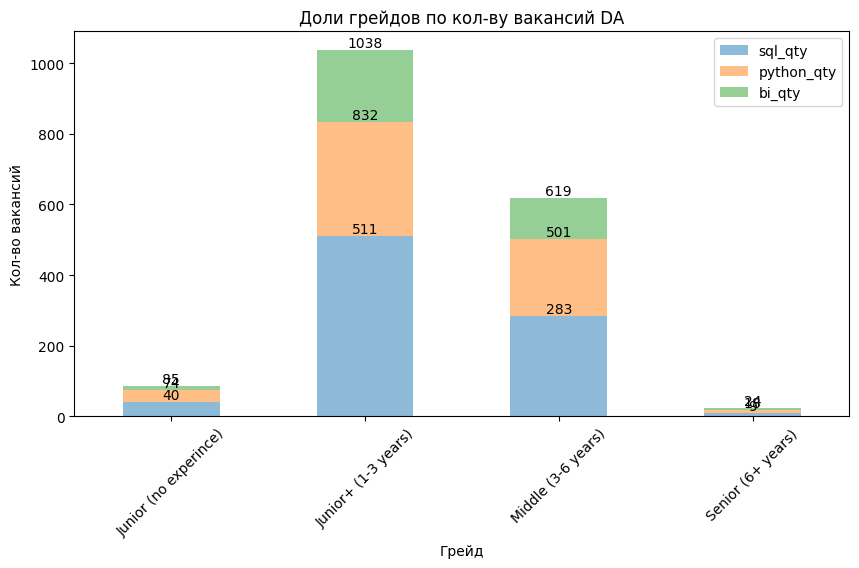

In [57]:
gr_1 = hard_skills_pivot_da.plot(x='grade', kind='bar', stacked=True, title='Доли грейдов по кол-ву вакансий DA', alpha=0.5, figsize=(10,5))
plt.xlabel('Грейд')
plt.ylabel('Кол-во вакансий')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
for container in gr_1.containers:
    gr_1.bar_label(container)

plt.show()

Большое кол-во запрашиваемых навыков у Junior+ связано с большим кол-вом вакансий на этот грейд.

Среди соискателей без опыта больше всего требуют знания SQL и Python: 47% и 40% от общего числа вакансий по грейду соответсвенно.

Среди соискателей с опытом 1-3 года работы и Middle знания SQL требуют чаще - 46-49%.

Среди Senior SQL и Python требуют в равной степени - по 38%.

In [58]:
#для DS
sql_vacancies_ds = data_ds[(data_ds['key_skills'].str.contains('SQL', case=False, na=False))]
sql_ds = sql_vacancies_ds.pivot_table(index='experience', values='name', aggfunc='count').reset_index()
sql_ds.columns = ['grade', 'sql_qty']

python_vacancies_ds = data_ds[(data_ds['key_skills'].str.contains('ython', case=False, na=False))]
python_ds = python_vacancies_ds.pivot_table(index='experience', values='name', aggfunc='count').reset_index()
python_ds.columns = ['grade', 'python_qty']

pandas_vacancies = data_ds[(data_ds['key_skills'].str.contains('panda', case=False, na=False))]
pandas = pandas_vacancies.pivot_table(index='experience', values='name', aggfunc='count').reset_index()
pandas.columns = ['grade', 'pandas_qty']

hard_skills_pivot_ds = sql_ds.merge(python_ds[['grade', 'python_qty']], on='grade', how = 'left')
hard_skills_pivot_ds = hard_skills_pivot_ds.merge(pandas[['grade', 'pandas_qty']], on='grade', how = 'left')
hard_skills_pivot_ds

,grade,sql_qty,python_qty,pandas_qty
0,Junior (no experince),5,17,8
1,Junior+ (1-3 years),141,195,195
2,Middle (3-6 years),126,216,167
3,Senior (6+ years),7,12,7


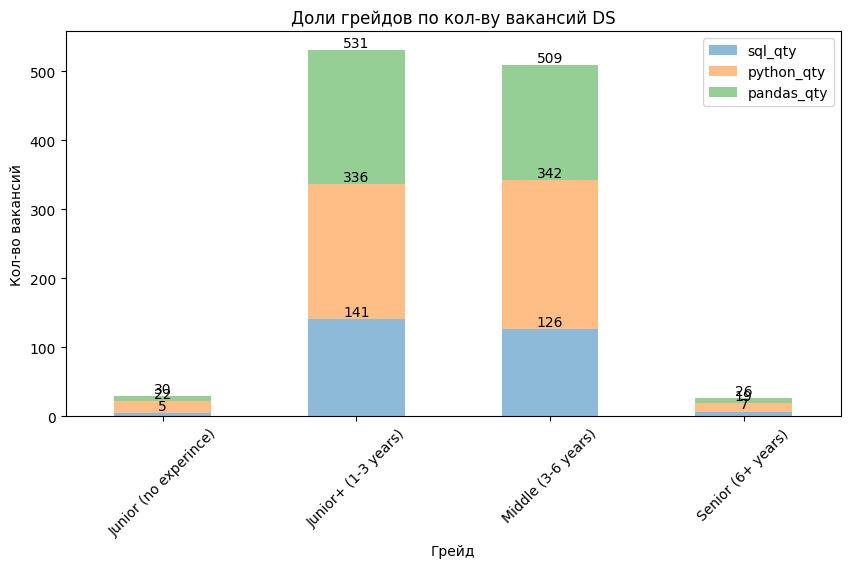

In [59]:
gr_2 = hard_skills_pivot_ds.plot(x='grade', kind='bar', stacked=True, title='Доли грейдов по кол-ву вакансий DS', alpha=0.5, figsize=(10,5))
plt.xlabel('Грейд')
plt.ylabel('Кол-во вакансий')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
for container in gr_2.containers:
    gr_2.bar_label(container)

plt.show()

Среди соискателей без опыта больше всего требуют знания Python: 72% от общего числа вакансий по грейду соответственно.

Среди соискателей с опытом 1-3 года работы и Middle знания Pandas, помимо Python, требуют чаще - 49% на 30% (Pandas на Python для Junior+) и 43% на 33% (Pandas на Python для Middle)соответственно.

Среди Senior знания Pandas, SQL и Python требуют в равной степени - в среднем по 33%.

### Анализ вакансий по дате размещения

In [60]:
##для DA
date_da = data_da.pivot_table(index='month', columns='experience', values='name', aggfunc='count').reset_index()
date_da = date_da.fillna(0)
date_da

experience,month,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years)
0,2024-02,0.0,0.0,1.0,0.0
1,2024-03,21.0,168.0,98.0,0.0
2,2024-04,36.0,310.0,140.0,4.0
3,2024-05,51.0,372.0,204.0,6.0
4,2024-06,34.0,241.0,112.0,3.0


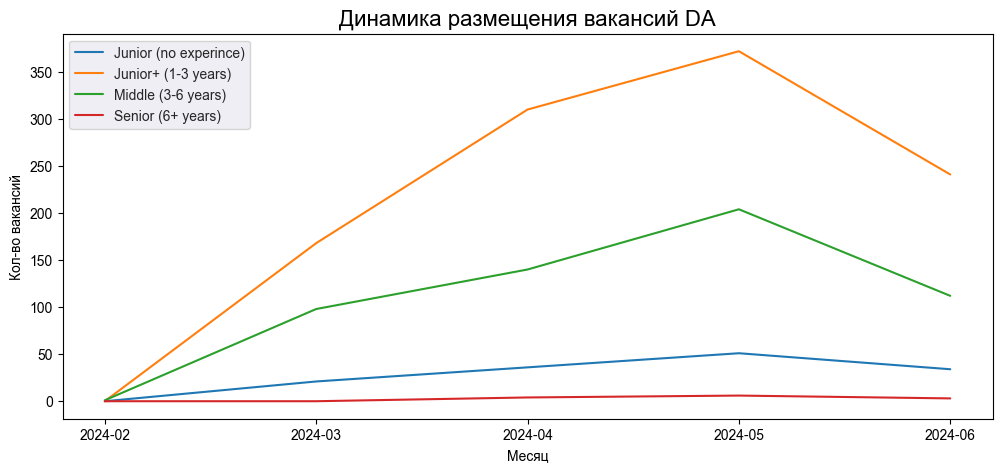

In [61]:
f, ax = plt.subplots(figsize=(12, 5))
sns.set_style('darkgrid')
sns.lineplot(y='Junior (no experince)', x='month', data=date_da, label='Junior (no experince)').set_title(
  'Динамика размещения вакансий DA', fontdict={'fontsize': 16}) 
sns.lineplot(y='Junior+ (1-3 years)', x='month', data=date_da, label='Junior+ (1-3 years)')
sns.lineplot(y='Middle (3-6 years)', x='month', data=date_da, label='Middle (3-6 years)')
sns.lineplot(y='Senior (6+ years)', x='month', data=date_da, label='Senior (6+ years)')
ax.legend(loc='upper left')
ax.set(ylabel='Кол-во вакансий', xlabel='Месяц')
ax.legend();

Среди вакансий DA пик количества объявлений составил в мае - совокупное число вакансий - 633 ед. Можно отметить, что динамика разбивки по грейдам от месяца к месяцу соблюдалась примерно на одном уровне.

In [62]:
##для DS
date_ds = data_ds.pivot_table(index='month', columns='experience', values='name', aggfunc='count').reset_index()
date_ds = date_ds.fillna(0)
date_ds

experience,month,Junior (no experince),Junior+ (1-3 years),Middle (3-6 years),Senior (6+ years)
0,2024-02,0.0,0.0,0.0,1.0
1,2024-03,13.0,103.0,105.0,6.0
2,2024-04,10.0,137.0,136.0,12.0
3,2024-05,14.0,94.0,116.0,6.0
4,2024-06,7.0,99.0,108.0,7.0


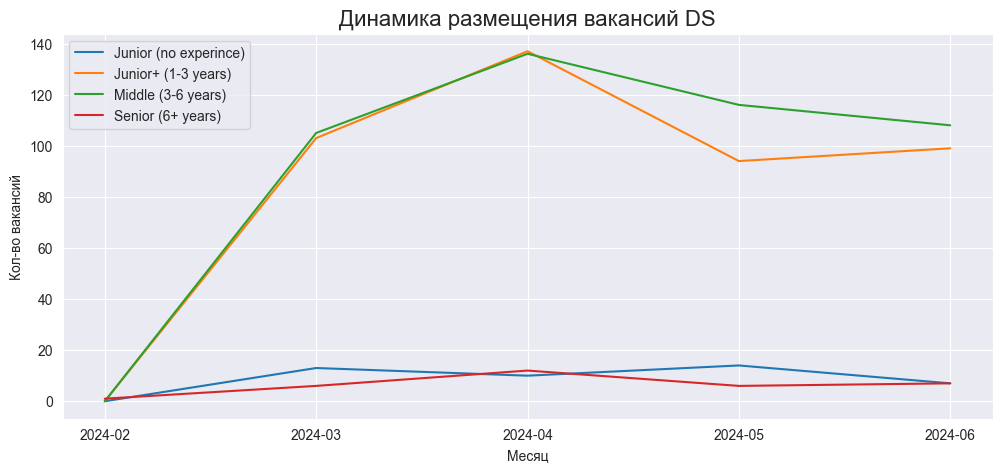

In [63]:
f, ax = plt.subplots(figsize=(12, 5))
sns.set_style('darkgrid')
sns.lineplot(y='Junior (no experince)', x='month', data=date_ds, label='Junior (no experince)').set_title(
  'Динамика размещения вакансий DS', fontdict={'fontsize': 16}) 
sns.lineplot(y='Junior+ (1-3 years)', x='month', data=date_ds, label='Junior+ (1-3 years)')
sns.lineplot(y='Middle (3-6 years)', x='month', data=date_ds, label='Middle (3-6 years)')
sns.lineplot(y='Senior (6+ years)', x='month', data=date_ds, label='Senior (6+ years)')
ax.legend(loc='upper left')
ax.set(ylabel='Кол-во вакансий', xlabel='Месяц')
ax.legend();

Среди вакансий DS пик количества объявлений составил в апреле - совокупное число вакансий - 295 ед. Отметим, что Junior без опыта и Senior в предлагаемых вакансиях крайне редки на протяжении 5 месяцев.

## Выводы и рекомендации

Проанализировав пул вакансий Data Analyst и Data Science за февраль-июнь 2024 года можно сделать следующие выводы:
- наиболее чаще ищут специалистов по анализу данных, вакансий DA на 85% больше DS;
- в разрезе грейдов чаще ищут Middle и Junior специалистов с опытом работы от 1-3 лет;
- больше всего вакансий представлено конгломератом СБЕР;
- зачастую, заработная плата не указана в вакансии, однако, стоит отметить, что уровень заработной платы не коррелируется с грейдом. Так, Junior+ и Middle специалист может получать до 300 тыс.руб., что в некоторых случаях соизмеримо с ЗП Senior. Такая ситуация встречается как у DA так и у DS;
- почти все работодатели ищут сотрудников на полный рабочий день с полной занятостью;
- среди топ хард навыков, требуемыми работодателями, можно выделить SQL, Python - универсальные для DA и DS. Частные случаи, это знание библиотеки Pandas для DS и BI систем для DA;
- наиболее активными для поиска работы месяцами выдались апрель и май.

Для будущего специалиста в области анализа данных можно описать следующую типичную вакансию:
Junior+/Middle специалист в СБЕР, ЗП до 200 тыс.руб., полный рабочий день, полная занятость, ключевые навыки: Python, SQL, Pandas, BI-системы.
Таким образом, можно уже сейчас понять условия работы, предлагаемые работодателями, а также обратить внимание на требуемые знания к должности.